### Visualize the selected study area and rgi60 glacier area
#### Region (with buffer): [91, 27, 99, 32]

In [1]:
# import os
# os.environ['PROJ_LIB'] = '/home/xin/miniconda3/envs/venv-glacier/share/proj'
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from matplotlib.colors import LinearSegmentedColormap


ERROR 1: PROJ: proj_create_from_database: Open of /home/xin/miniconda3/envs/venv-glacier/share/proj failed


In [2]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_river_vec = 'data/water/major_rivers_global.gpkg'
path_setp_rgi60 = 'data/rgi60/rgi60_setp.gpkg'
path_dem = 'data/dem-data/srtm-c/SRTMGL3_900m.tif'
path_wat = 'data/water/water-jrc/occurrence_mosaic_subs_300m.tif'


In [3]:
dem, dem_info = readTiff(path_dem)
wat, wat_info = readTiff(path_wat)
dem_info

{'geoextent': (90.99958333327177,
  98.99958333326995,
  27.00041666667417,
  32.00041666667303),
 'geotrans': (90.99958333327177,
  0.00833333333333144,
  0.0,
  32.00041666667303,
  0.0,
  -0.00833333333333144),
 'geosrs': '4326',
 'row': 600,
 'col': 960,
 'bands': 1}

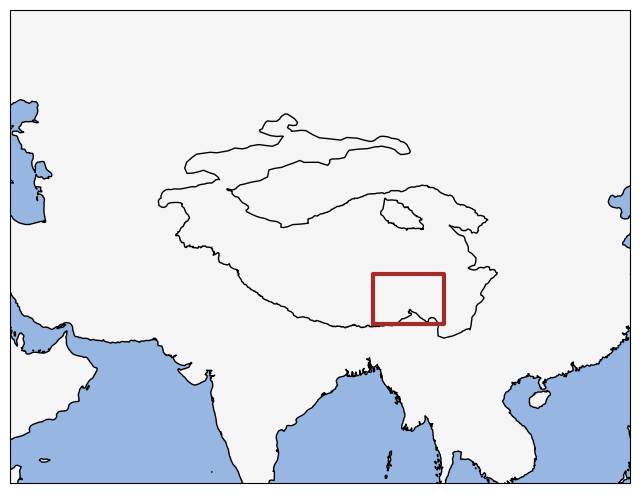

In [4]:
region_x = [91, 99, 99, 91, 91]
region_y = [27, 27, 32, 32, 27]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
# ax.stock_img()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.COASTLINE, edgecolor='Black')
ax.set_extent([50, 120, 10, 48.0])
# 1. hma region
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                                crs=ccrs.PlateCarree(), linewidth=1, edgecolor='black', facecolor='none')
ax.add_feature(shp_fea, zorder=1)
# 2. rectangle region of the study area.
plt.plot(region_x, region_y, transform=ccrs.PlateCarree(), linewidth=3, color='brown')


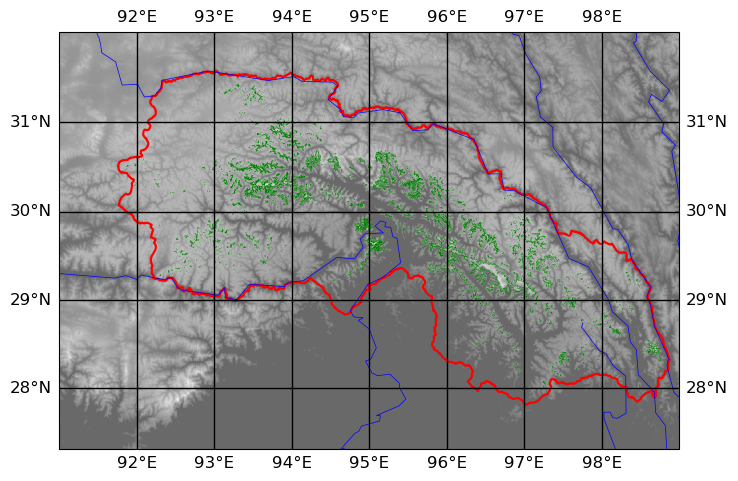

In [5]:
cmap_dem = LinearSegmentedColormap.from_list('linear color', ["DimGray", "white"])
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.3, 32])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='black')

## 0. dem image
ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                vmin=3500, vmax=7000, cmap=cmap_dem, \
                                transform=ccrs.PlateCarree(), zorder=0)   ## cmap:PRGn
# ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)

## 1. Tibeteau southeast boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. rivers
shp_fea = cfeature.ShapelyFeature(Reader(path_river_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=0.5, facecolor='none')
ax.add_feature(shp_fea, zorder=1)

## 3. setp glaciers (rgi60); note: very slow
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_rgi60).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='green', linewidth=0.2, facecolor='none')
ax.add_feature(shp_fea, zorder=0)


Text(0.5, 1.0, 'wat')

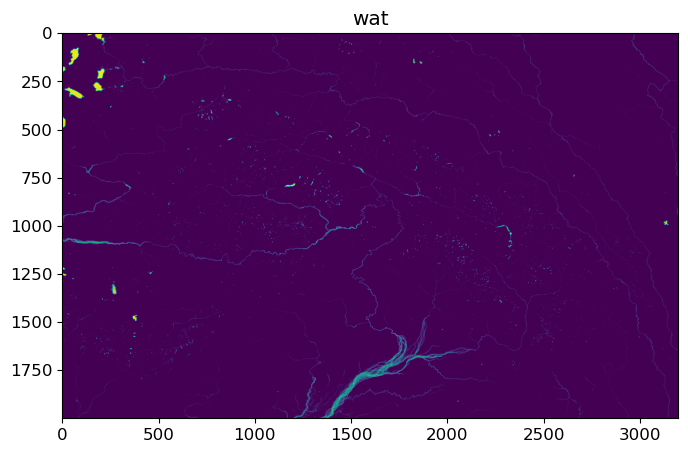

In [6]:
plt.figure(figsize=(10,5))
plt.imshow(wat); plt.title('wat')
